# Linear Regression

<meta name="title" property="og:title" content="Linear Regression">
<meta name="image" property="og:image" content="./images/linear_reg1.png">
<meta name="author" content="Nishant Baheti">

* linear regression, a very simple approach for supervised learning. In particular, linear regression is a useful tool for predicting a quantitative response. 
* In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).
* The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

```
                                training-set
                                    |
                                    V
                            Learning algorithm
                                    |
                                    V
                            +-------------+
                test -->    | hypothesis  | --> estimation
                            |    / Model  |
                            +-------------+
```

\begin{align}
    \text{Hypothesis } h_\theta(x) &= \theta_0 + \theta_1  x
    \text{, Where Parameters } : \theta_0, \theta_1\\
\end{align}

\begin{align}
    \text{Cost Function } &: J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta{(x^{(i)}) - y^{(i)}})^2\\
    \\
    \text{Goal} &: {{minimize}\atop{\theta_0,\theta_1}} J(\theta_0,\theta_1)
\end{align}

## Generate Data

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import seaborn as sns

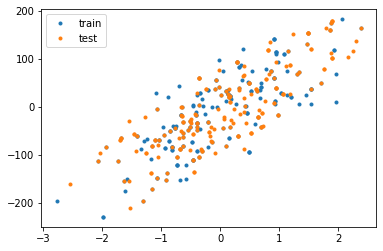

In [2]:
n_samples = 300

X, y = make_regression(n_samples=n_samples, n_features=1, noise=50,random_state=0)
y = y.reshape(-1,1)

train_size = 0.7 # 70%
random_idxs = np.random.randint(0, n_samples, int(np.ceil(n_samples * train_size)))

X_train, y_train = X[random_idxs], y[random_idxs]
X_test, y_test = X[~random_idxs], y[~random_idxs]


plt.plot(X_train, y_train,'.', label='train')
plt.plot(X_test, y_test,'.', label='test')
plt.legend()
plt.show()


- X = (m,n), 
   where \
       m = number of samples \
       n = number of features
     
- Add $X_0$ (column 0 as 1) for bias in linear regression 
    \begin{align}
    h_\theta(x) &= \theta_0  X_0 + \theta_1  X_1 \\
    \because X_0 &= 1 \\
    h_\theta(x) &= \theta_0 + \theta_1  X_1 \\
    \end{align}

In [3]:
print(X.shape, y.shape)

(300, 1) (300, 1)


In [4]:
m, n = X.shape
print("number of columns (features) :",n)
print("number of samples (rows) :",m)

number of columns (features) : 1
number of samples (rows) : 300


In [5]:
def add_axis_for_bias(X_i):
    
    X_i = X_i.copy()
    if len(X_i.shape) == 1:
        X_i = X_i.reshape(-1,1)

    if False in (X_i[...,0] == 1):        
        return np.hstack(tup=(np.ones(shape=(X_i.shape[0],1)) , X_i))
    else:
        return X_i

## Check for bias column(column 0)

In [6]:
arr = np.array([
    [1,2,3,4],
    [1,6,7,8],
    [1,11,12,13],
    [1,4,2,4],
    [1,5,2,1],
    [1,7,54,23]
])

arr.shape 

(6, 4)

- this means 6 rows and 4 columns

In [7]:
False not in (arr[...,0] == 1)

True

In [8]:
np.sum(arr), np.sum(arr, axis=0), np.sum(arr, axis=1)

(174, array([ 6, 35, 80, 53]), array([10, 22, 37, 11,  9, 85]))

In [9]:
np.mean(arr), np.mean(arr,axis=0), np.mean(arr, axis=1)

(7.25,
 array([ 1.        ,  5.83333333, 13.33333333,  8.83333333]),
 array([ 2.5 ,  5.5 ,  9.25,  2.75,  2.25, 21.25]))

`for us calculation will be done column wise so axis = 0 everywhere`

## Regression Models Error Evaluation Functions

### Mean Squared Error

In [10]:
def calculate_mse(y_pred,y):
    return np.square(y_pred - y).mean()

### Root Mean Squared Error

In [11]:
def calculate_rmse(y_pred,y):
    return np.sqrt(np.square(y_pred - y).mean())

### Mean Absolute Error

In [12]:
def calculate_mae(y_pred,y):
    return np.abs(y_pred - y).mean()

## Algorithm

<!-- 
       
        
$h(x) = \theta_0 + \theta_1 . X$

Affine Function = linear function + a constant -->

### Cost Function

\begin{align}
J(\theta_0,\theta_1) & =\frac{1}{2m}\sum_{i=1}^{m}({h_\theta{(x^{(i)}) - y^{(i)}}})^2
\end{align}

In [13]:
def calculate_cost(y_pred,y):
    return np.mean(np.square(y_pred - y)) / 2 

### Derivative
\begin{align}
\frac{\partial J(\theta_0,\theta_1)}{\partial \theta} &= \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}). x^{(i)}
\end{align}

In [14]:
def derivative(X, y, y_pred):
    return np.mean( ( y_pred - y ) * X, axis = 0 )

### Gradient Descent Algorithm

\begin{align}
\text{repeat until convergence } \{ \\
\theta_j &:= \theta_j - \alpha \frac{\partial}{\partial\theta_j}{J(\theta_0,\theta_1)}\\ 
\}\text{ for j=0 and j=1 }\\
\\
\text{and simultaneously update }\\
temp_0 &:= \theta_0 - \alpha\frac{\partial}{\partial\theta_0}{J(\theta_0,\theta_1)}\\
temp_1 &:= \theta_1 - \alpha\frac{\partial}{\partial\theta_1}{J(\theta_0,\theta_1)}\\
\theta_0 &:= temp_0\\
\theta_1 &:= temp_1
\end{align}





### Final algorithm


\begin{align}
\text{repeat until convergence }\{\\
\theta_0 &:= \theta_0 - \alpha \frac{1}{m}{\sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})}}\\
\theta_1 &:= \theta_1 - \alpha \frac{1}{m}{\sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})}}.{x^{(i)}}\\
\}
\end{align}


## Generate Prediction

In [15]:
def predict(theta,X):
    format_X = add_axis_for_bias(X)
        
    if format_X.shape[1] == theta.shape[0]:
        y_pred = format_X @ theta # (m,1) = (m,n) * (n,1)
        return y_pred
    elif format_X.shape[1] == theta.shape[1]:
        y_pred = format_X @ theta.T # (m,1) = (m,n) * (n,1)
        return y_pred
    else:
        raise ValueError("Shape is not proper.")

## Batch Gradient Descent
<img src="images/linear_reg2.png" alt="linear_reg2"/>

In [16]:
def linear_regression_bgd(X, y, verbose = True, theta_precision = 0.001, alpha = 0.01, iterations = 10000):
    X = add_axis_for_bias(X)
    
    # number of features+1 because of theta_0
    m, n = X.shape

    theta_history = []
    cost_history = []

    theta = np.random.rand(1,n) * theta_precision
    
    for iteration in range(iterations):
        # calculate y_pred 
        theta_history.append(theta[0])
        
        y_pred = predict(theta,X)

        # simultaneous operation 
        gradient = derivative(X, y, y_pred)
        
        theta = theta - (alpha *  gradient) # override with new θ 

        if np.isnan(np.sum(theta)) or np.isinf(np.sum(theta)):
            print("breaking. found inf or nan.")
            break

        # calculate cost to put in history
        cost = calculate_cost(predict(theta, X), y)
        
        cost_history.append(cost)
        
    return theta, np.array(theta_history), np.array(cost_history)


### Cost function vs weights $J(\theta_0, \theta_1)$

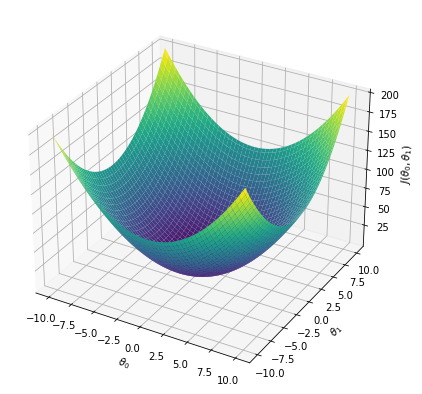

In [17]:

theta0,theta1 = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
j = theta0**2 + theta1**2

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

ax.plot_surface(theta0, theta1, j, cmap='viridis')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta_0,\\theta_1)$')

plt.show()

### Debugging gradient descent 

<img src="images/linear_reg6.png" alt="linear_reg6"/>

if learning rate is high, theta value will increase too much and eventually shoot out of the plot.
`see an example below.`

if learning rate is appropriate then value of cost/loss will decrease and eventually flatlines (decrement is too less to matter).
`see an example below`

we can try different learning rate like 0.001, 0.003, 0.01, 0.03, 0.1 etc.

### Animation Function

In [18]:
from utility import regression_animation

### Training with high learning rate

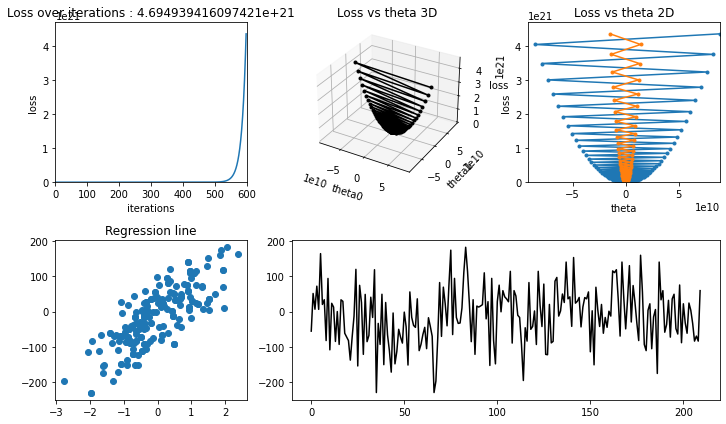

In [31]:
iterations = 600
learning_rate = 2.03

theta, theta_history, cost_history = linear_regression_bgd(X_train, y_train, verbose=True, theta_precision = 0.001, 
                                                           alpha = learning_rate ,iterations = iterations)

regression_animation(X_train, y_train, cost_history, theta_history, iterations, interval=10)

**learning rate is high, model couldn't converge(find minima in loss-theta curve), hence $J(\theta_0, \theta_1)$ increased.**

### Training with learning rate = 0.01

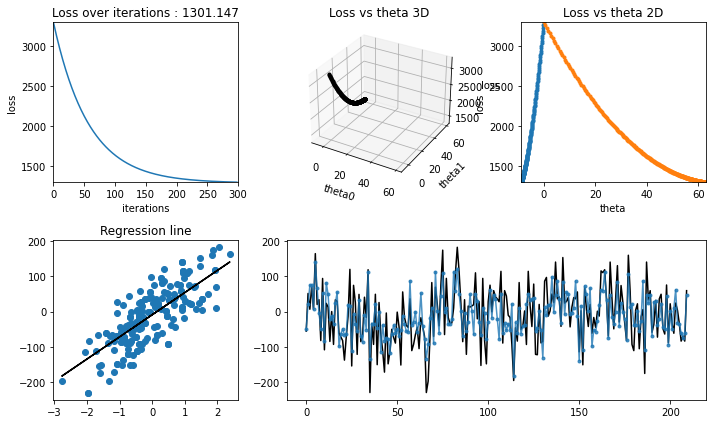

In [20]:
iterations = 300
learning_rate = 0.01

theta, theta_history, cost_history = linear_regression_bgd(X_train, y_train, verbose=True, theta_precision = 0.001, 
                                                           alpha = learning_rate ,iterations = iterations)

regression_animation(X_train, y_train, cost_history, theta_history, iterations, interval=10)

#### Testing

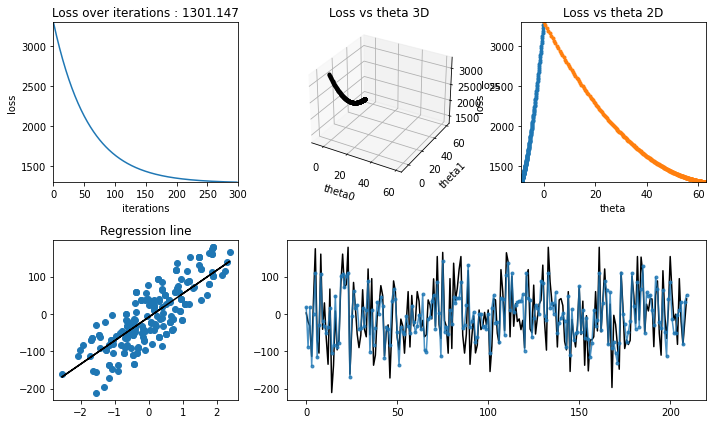

In [21]:
regression_animation(X_test, y_test, cost_history, theta_history, iterations, interval=10)

## Stochastic gradient Descent

* Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). 
* It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). 
* Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate.

It is 
- an iterative method
- train over random samples of a batch size instead of training on whole dataset 
- faster convergence on large dataset


In [22]:
def linear_regression_sgd(X, y, verbose=True, theta_precision = 0.001, batch_size=30, 
                          alpha = 0.01 ,iterations = 10000):
    X = add_axis_for_bias(X)
    
    # number of features+1 because of theta_0
    m, n = X.shape

    theta_history = []
    cost_history = []

    theta = np.random.rand(1,n) * theta_precision
    
    for iteration in range(iterations):
        
        theta_history.append(theta[0])
        
        # creating indices for batches
        indices = np.random.randint(0, m, size=batch_size)

        # creating batch for this iteration
        X_rand = X[indices]
        y_rand = y[indices]

        y_pred = predict(theta, X_rand)

        # simultaneous operation 
        gradient = derivative(X_rand, y_rand, y_pred)
        theta = theta - (alpha *  gradient)

        if np.isnan(np.sum(theta)) or np.isinf(np.sum(theta)):
            print("breaking. found inf or nan.")
            break

        # calculate cost to put in history
        cost = calculate_cost(predict(theta, X_rand), y_rand)
        cost_history.append(cost)

        # calcualted theta in history
    return theta, np.array(theta_history), np.array(cost_history)

### Training for learning rate = 0.01

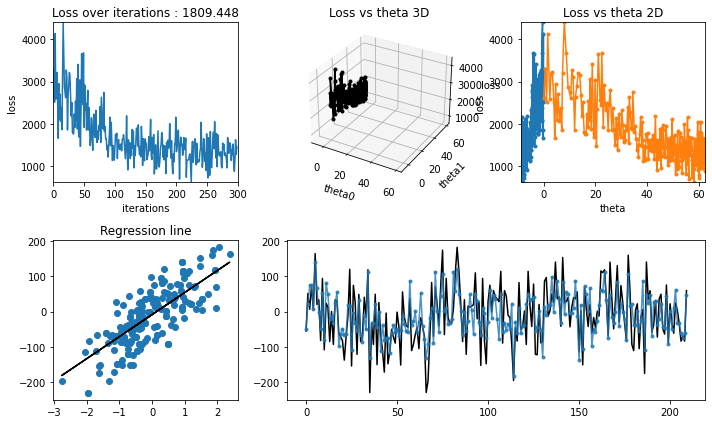

In [23]:
iterations = 300
learning_rate = 0.01

theta, theta_history, cost_history = linear_regression_sgd(X_train, y_train, verbose=True, theta_precision = 0.001, 
                                                           alpha = learning_rate ,iterations = iterations)

regression_animation(X_train, y_train, cost_history,theta_history, iterations, interval=10)

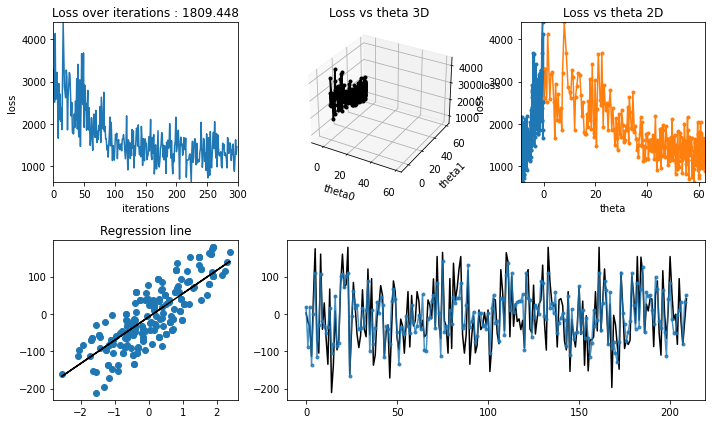

In [24]:
regression_animation(X_test, y_test, cost_history,theta_history, iterations, interval=10)

## Normal Equation


`normal equation vs gradient descent`

| Gradient Descent | Normal Equation | 
| - | - | 
| Need to choose learning rate alpha | no need to choose alpha |
| needs iteration | doesn't need iterations |
| works well with large number of features ( n large ) | computation increases for large n |
| feature scaling will help in convergence | no need to do feature scaling |


### Algorithm

\begin{align}
\theta = (X^T  X)^{-1}  X^T  y
\end{align}



In [25]:
def linear_regression_normaleq(X, y):
    X = add_axis_for_bias(X)
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [26]:
theta = linear_regression_normaleq(X_train, y_train)

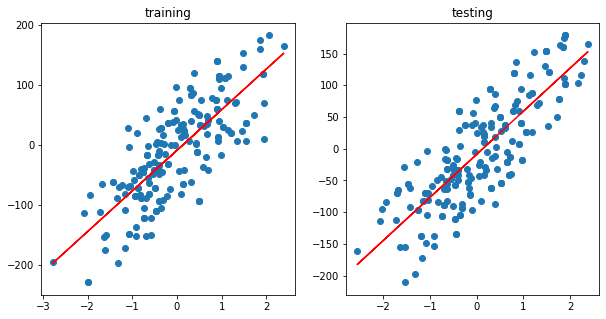

In [27]:

fig, ax = plt.subplots(1,2, figsize=(10, 5))

y_pred = predict(theta, X_train)

ax[0].scatter(X_train, y_train)
ax[0].plot(X_train, y_pred, c='r')
ax[0].set_title("training")

y_pred = predict(theta, X_test)

ax[1].scatter(X_test, y_test)
ax[1].plot(X_test,y_pred,c='r')
ax[1].set_title("testing")

plt.show()
